## Import Required Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import CSV file

In [70]:
car = pd.read_csv("CarPrice.csv")

In [71]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
car.shape

(205, 26)

In [32]:
car.count()

car_ID              205
symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64

In [33]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [34]:
unique = car['CarName'].nunique()
print(unique)

147


In [35]:
car['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [36]:
car['CarName'].value_counts()[car['CarName'].value_counts() == 1]


peugeot 304         1
peugeot 504 (sw)    1
renault 5 gtl       1
renault 12tl        1
porsche boxter      1
                   ..
mazda glc 4         1
mazda rx2 coupe     1
maxda glc deluxe    1
maxda rx3           1
volvo 246           1
Name: CarName, Length: 109, dtype: int64

In [37]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Feature Engineering

In [38]:
#fuel type car body drive wheel engine loc len wid high noofcyli stroke horsepo symbol
car1 = car.drop(['car_ID','aspiration','CarName','doornumber','wheelbase','enginetype','enginesize','curbweight','fuelsystem','boreratio','compressionratio','peakrpm','citympg','highwaympg'],axis = 'columns')
car1.head()

,symboling,fueltype,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,cylindernumber,stroke,horsepower,price
0,3,gas,convertible,rwd,front,168.8,64.1,48.8,four,2.68,111,13495.0
1,3,gas,convertible,rwd,front,168.8,64.1,48.8,four,2.68,111,16500.0
2,1,gas,hatchback,rwd,front,171.2,65.5,52.4,six,3.47,154,16500.0
3,2,gas,sedan,fwd,front,176.6,66.2,54.3,four,3.40,102,13950.0
4,2,gas,sedan,4wd,front,176.6,66.4,54.3,five,3.40,115,17450.0


In [39]:
car1.columns

Index(['symboling', 'fueltype', 'carbody', 'drivewheel', 'enginelocation',
       'carlength', 'carwidth', 'carheight', 'cylindernumber', 'stroke',
       'horsepower', 'price'],
      dtype='object')

## Visualizing

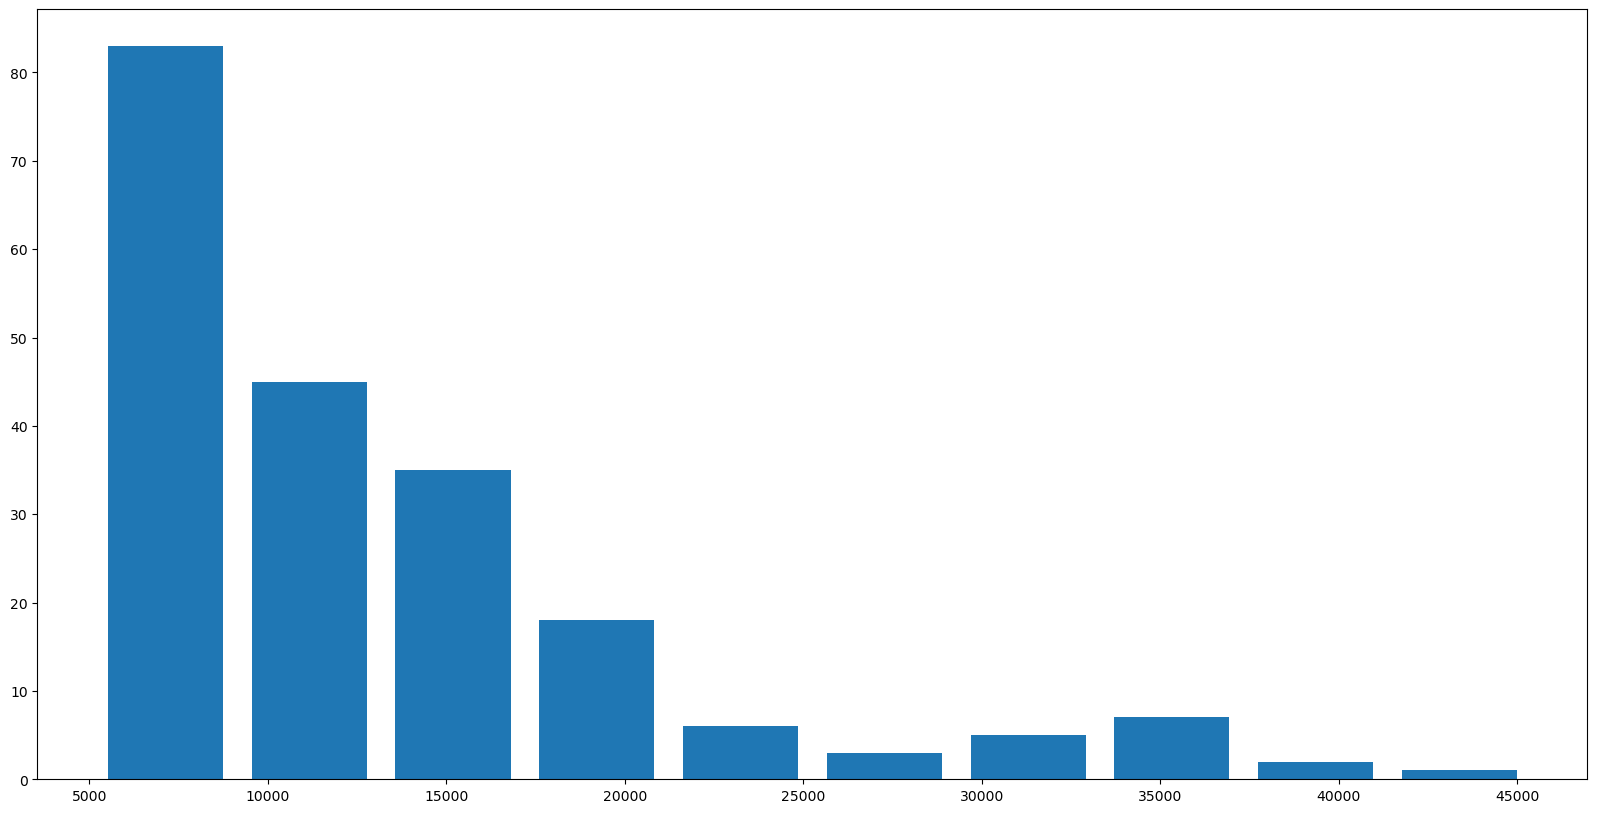

In [40]:
plt.rcParams["figure.figsize"]= (20,10)
plt.hist(car1.price, rwidth=0.8)
plt.xlabel="Price per sq. ft."
plt.ylabel="count"

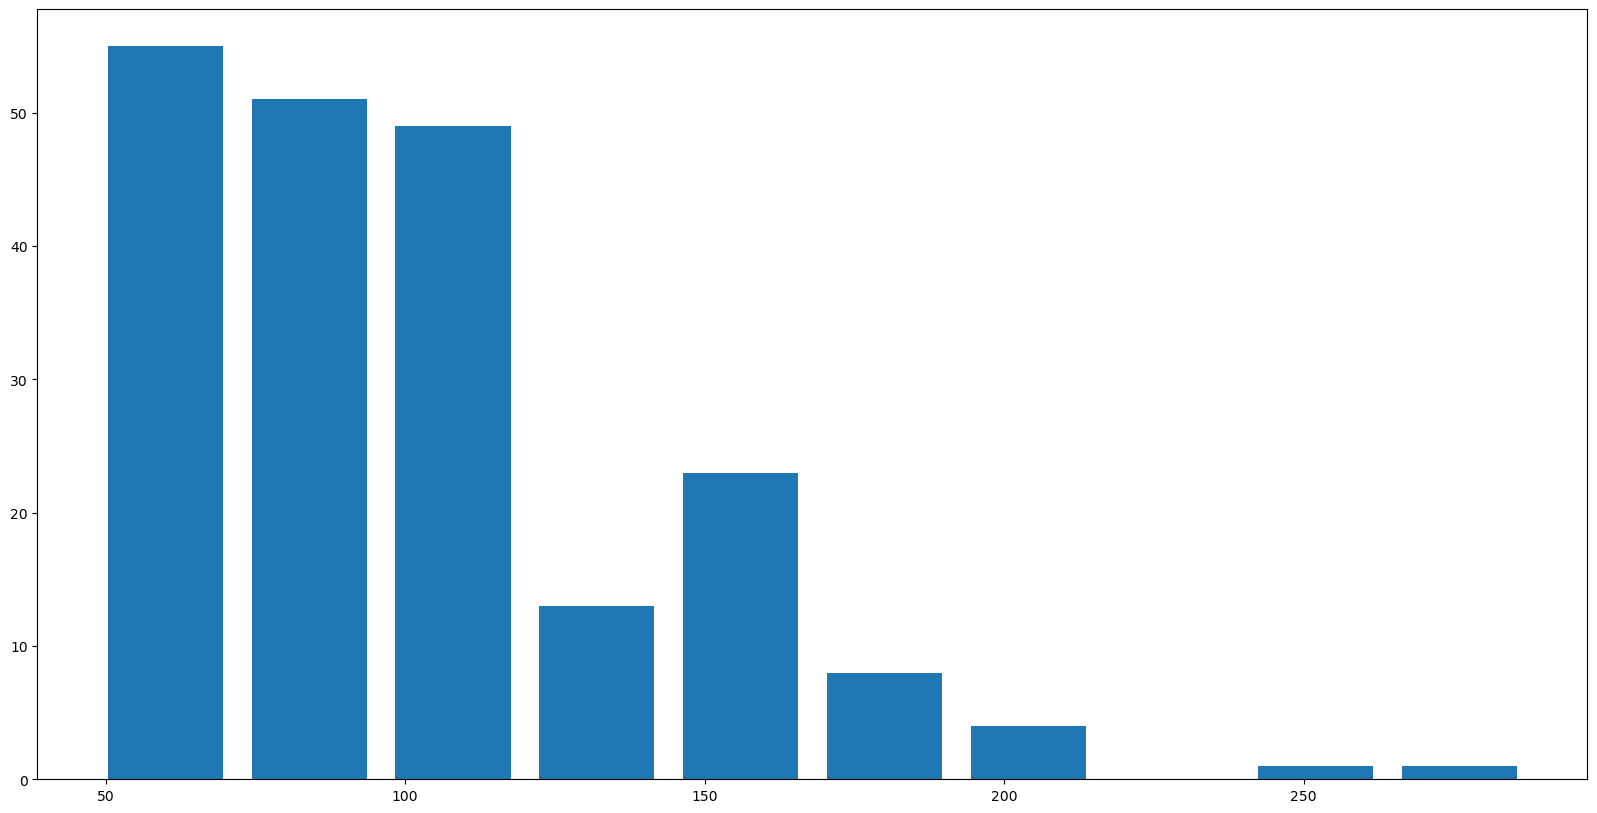

In [41]:
plt.rcParams["figure.figsize"]= (20,10)
plt.hist(car1.horsepower, rwidth=0.8)
plt.xlabel="Price per sq. ft."
plt.ylabel="count"

In [42]:
car1['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [43]:
car1['cylindernumber'] = car['cylindernumber'].replace({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8})
car1

,symboling,fueltype,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,cylindernumber,stroke,horsepower,price
0,3,gas,convertible,rwd,front,168.8,64.1,48.8,4,2.68,111,13495.0
1,3,gas,convertible,rwd,front,168.8,64.1,48.8,4,2.68,111,16500.0
2,1,gas,hatchback,rwd,front,171.2,65.5,52.4,6,3.47,154,16500.0
3,2,gas,sedan,fwd,front,176.6,66.2,54.3,4,3.40,102,13950.0
4,2,gas,sedan,4wd,front,176.6,66.4,54.3,5,3.40,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,sedan,rwd,front,188.8,68.9,55.5,4,3.15,114,16845.0
201,-1,gas,sedan,rwd,front,188.8,68.8,55.5,4,3.15,160,19045.0
202,-1,gas,sedan,rwd,front,188.8,68.9,55.5,6,2.87,134,21485.0
203,-1,diesel,sedan,rwd,front,188.8,68.9,55.5,6,3.40,106,22470.0


In [44]:
car1.dtypes

symboling           int64
fueltype           object
carbody            object
drivewheel         object
enginelocation     object
carlength         float64
carwidth          float64
carheight         float64
cylindernumber      int64
stroke            float64
horsepower          int64
price             float64
dtype: object

In [45]:
car1.columns

Index(['symboling', 'fueltype', 'carbody', 'drivewheel', 'enginelocation',
       'carlength', 'carwidth', 'carheight', 'cylindernumber', 'stroke',
       'horsepower', 'price'],
      dtype='object')

## Creating dummy data of Object datatype column
### And Concat with the dataset

In [72]:
dummies=pd.get_dummies(car1.fueltype)
dummies.head(5)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [47]:
car2=pd.concat([car1,dummies],axis='columns')
car2.head()

,symboling,fueltype,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,cylindernumber,stroke,horsepower,price,diesel,gas
0,3,gas,convertible,rwd,front,168.8,64.1,48.8,4,2.68,111,13495.0,0,1
1,3,gas,convertible,rwd,front,168.8,64.1,48.8,4,2.68,111,16500.0,0,1
2,1,gas,hatchback,rwd,front,171.2,65.5,52.4,6,3.47,154,16500.0,0,1
3,2,gas,sedan,fwd,front,176.6,66.2,54.3,4,3.40,102,13950.0,0,1
4,2,gas,sedan,4wd,front,176.6,66.4,54.3,5,3.40,115,17450.0,0,1


In [48]:
#,car1.carbody,car.drivewheel,car.enginelocation
dummies=pd.get_dummies(car2.carbody)
dummies.head(5)

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [49]:
car3=pd.concat([car2,dummies],axis='columns')
car3.head()


,symboling,fueltype,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,cylindernumber,stroke,horsepower,price,diesel,gas,convertible,hardtop,hatchback,sedan,wagon
0,3,gas,convertible,rwd,front,168.8,64.1,48.8,4,2.68,111,13495.0,0,1,1,0,0,0,0
1,3,gas,convertible,rwd,front,168.8,64.1,48.8,4,2.68,111,16500.0,0,1,1,0,0,0,0
2,1,gas,hatchback,rwd,front,171.2,65.5,52.4,6,3.47,154,16500.0,0,1,0,0,1,0,0
3,2,gas,sedan,fwd,front,176.6,66.2,54.3,4,3.40,102,13950.0,0,1,0,0,0,1,0
4,2,gas,sedan,4wd,front,176.6,66.4,54.3,5,3.40,115,17450.0,0,1,0,0,0,1,0


In [50]:
dummies=pd.get_dummies(car3.drivewheel)
car4=pd.concat([car3,dummies],axis='columns')
car4.head()

,symboling,fueltype,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,cylindernumber,stroke,...,diesel,gas,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd
0,3,gas,convertible,rwd,front,168.8,64.1,48.8,4,2.68,...,0,1,1,0,0,0,0,0,0,1
1,3,gas,convertible,rwd,front,168.8,64.1,48.8,4,2.68,...,0,1,1,0,0,0,0,0,0,1
2,1,gas,hatchback,rwd,front,171.2,65.5,52.4,6,3.47,...,0,1,0,0,1,0,0,0,0,1
3,2,gas,sedan,fwd,front,176.6,66.2,54.3,4,3.40,...,0,1,0,0,0,1,0,0,1,0
4,2,gas,sedan,4wd,front,176.6,66.4,54.3,5,3.40,...,0,1,0,0,0,1,0,1,0,0


In [51]:
#car.enginelocation
dummies=pd.get_dummies(car4.enginelocation)
car5=pd.concat([car4,dummies],axis='columns')
car5.head()

,symboling,fueltype,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,cylindernumber,stroke,...,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear
0,3,gas,convertible,rwd,front,168.8,64.1,48.8,4,2.68,...,1,0,0,0,0,0,0,1,1,0
1,3,gas,convertible,rwd,front,168.8,64.1,48.8,4,2.68,...,1,0,0,0,0,0,0,1,1,0
2,1,gas,hatchback,rwd,front,171.2,65.5,52.4,6,3.47,...,0,0,1,0,0,0,0,1,1,0
3,2,gas,sedan,fwd,front,176.6,66.2,54.3,4,3.40,...,0,0,0,1,0,0,1,0,1,0
4,2,gas,sedan,4wd,front,176.6,66.4,54.3,5,3.40,...,0,0,0,1,0,1,0,0,1,0


In [52]:
car6 = car5.drop(['enginelocation','fueltype','carbody','drivewheel'],axis = 'columns')
car6.head()

,symboling,carlength,carwidth,carheight,cylindernumber,stroke,horsepower,price,diesel,gas,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear
0,3,168.8,64.1,48.8,4,2.68,111,13495.0,0,1,1,0,0,0,0,0,0,1,1,0
1,3,168.8,64.1,48.8,4,2.68,111,16500.0,0,1,1,0,0,0,0,0,0,1,1,0
2,1,171.2,65.5,52.4,6,3.47,154,16500.0,0,1,0,0,1,0,0,0,0,1,1,0
3,2,176.6,66.2,54.3,4,3.40,102,13950.0,0,1,0,0,0,1,0,0,1,0,1,0
4,2,176.6,66.4,54.3,5,3.40,115,17450.0,0,1,0,0,0,1,0,1,0,0,1,0


In [53]:
car6.columns

Index(['symboling', 'carlength', 'carwidth', 'carheight', 'cylindernumber',
       'stroke', 'horsepower', 'price', 'diesel', 'gas', 'convertible',
       'hardtop', 'hatchback', 'sedan', 'wagon', '4wd', 'fwd', 'rwd', 'front',
       'rear'],
      dtype='object')

In [54]:
X=car6.drop('price',axis='columns')
X.head()

,symboling,carlength,carwidth,carheight,cylindernumber,stroke,horsepower,diesel,gas,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear
0,3,168.8,64.1,48.8,4,2.68,111,0,1,1,0,0,0,0,0,0,1,1,0
1,3,168.8,64.1,48.8,4,2.68,111,0,1,1,0,0,0,0,0,0,1,1,0
2,1,171.2,65.5,52.4,6,3.47,154,0,1,0,0,1,0,0,0,0,1,1,0
3,2,176.6,66.2,54.3,4,3.40,102,0,1,0,0,0,1,0,0,1,0,1,0
4,2,176.6,66.4,54.3,5,3.40,115,0,1,0,0,0,1,0,1,0,0,1,0


In [55]:
Y = car6.price
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [56]:
car6.columns

Index(['symboling', 'carlength', 'carwidth', 'carheight', 'cylindernumber',
       'stroke', 'horsepower', 'price', 'diesel', 'gas', 'convertible',
       'hardtop', 'hatchback', 'sedan', 'wagon', '4wd', 'fwd', 'rwd', 'front',
       'rear'],
      dtype='object')

## Import Libraries for machine learning Model

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [74]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.5991428323425033

In [75]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.75974868, 0.83658711, 0.8211512 , 0.7748265 , 0.88003363])

In [76]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 

def best_model_using_GridSearchCV(X,Y):
    algos={
        'linera_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize':[True,False]
            }
        },
        'lasso': {
            'model':Lasso(),
            'params': {
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'desicion_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','fried_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores=[]
    cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    
best_model_using_GridSearchCV(X,Y)   

/Users/alokrajgond/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/alokrajgond/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pi

,model,best_score,best_params
0,linera_regression,0.814469,{'normalize': True}
1,lasso,0.814752,"{'alpha': 2, 'selection': 'random'}"
2,desicion_tree,0.835806,"{'criterion': 'mse', 'splitter': 'best'}"


In [77]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [78]:
cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
scores = cross_val_score(DecisionTreeRegressor(),X,Y,cv=cv)
scores

array([0.85693791, 0.90425631, 0.75686467, 0.83755094, 0.82969343])

In [79]:
# find index of maximum score
max_index = scores.argmax()

In [80]:
# get the split with maximum score
for i, (train_index, test_index) in enumerate(cv.split(X)):
    if i == max_index:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        break

# fit the model using the selected split
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

score = model.score(X_test, Y_test)
print(f"Score on test data: {score}")

Score on test data: 0.9175528571904895


In [81]:
X.columns

Index(['symboling', 'carlength', 'carwidth', 'carheight', 'cylindernumber',
       'stroke', 'horsepower', 'diesel', 'gas', 'convertible', 'hardtop',
       'hatchback', 'sedan', 'wagon', '4wd', 'fwd', 'rwd', 'front', 'rear'],
      dtype='object')

In [82]:
def predict_price(symboling, fueltype, carbody, drivewheel, enginelocation, carlength, carwidth, carheight, cylindernumber, stroke, horsepower):
    # create a dictionary with the input values
    input_dict = {'symboling': symboling, 'carlength': carlength, 'carwidth': carwidth, 'carheight': carheight, 'cylindernumber': cylindernumber, 'stroke': stroke, 'horsepower': horsepower,
                  'diesel': int(fueltype=='diesel'), 'gas': int(fueltype=='gas'), 'convertible': int(carbody=='convertible'), 'hardtop': int(carbody=='hardtop'), 'hatchback': int(carbody=='hatchback'),
                  'sedan': int(carbody=='sedan'), 'wagon': int(carbody=='wagon'), '4wd': int(drivewheel=='4wd'), 'fwd': int(drivewheel=='fwd'), 'rwd': int(drivewheel=='rwd'),
                  'front': int(enginelocation=='front'), 'rear': int(enginelocation=='rear')}
    # convert the dictionary to a DataFrame and use the same column order as the training data
    input_df = pd.DataFrame([input_dict])[['symboling', 'carlength', 'carwidth', 'carheight', 'cylindernumber', 'stroke', 'horsepower', 'diesel', 'gas', 'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon', '4wd', 'fwd', 'rwd', 'front', 'rear']]
    # make the prediction using the trained model
    prediction = lr_clf.predict(input_df)[0]
    return '{:.2f}'.format(prediction)

In [83]:
car1.head()

,symboling,fueltype,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,cylindernumber,stroke,horsepower,price
0,3,gas,convertible,rwd,front,168.8,64.1,48.8,4,2.68,111,13495.0
1,3,gas,convertible,rwd,front,168.8,64.1,48.8,4,2.68,111,16500.0
2,1,gas,hatchback,rwd,front,171.2,65.5,52.4,6,3.47,154,16500.0
3,2,gas,sedan,fwd,front,176.6,66.2,54.3,4,3.40,102,13950.0
4,2,gas,sedan,4wd,front,176.6,66.4,54.3,5,3.40,115,17450.0


In [84]:
predict_price(-1,'gas','convertible','4wd','front',168.8,64.1,48.8,4,2.68,111)

'12443.62'

In [85]:
predict_price(3,'gas','convertible','4wd','rear',168.8,64.1,48.8,4,2.68,111)

'20549.84'